In [8]:
import pyemma
pyemma.__version__
# IMPORT GENERAL PACKAGES
import numpy as np
from IPython import get_ipython
get_ipython().run_line_magic('pylab','')
import pyemma.coordinates as coor
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
#import mdshare
import pyemma
from distutils import util



Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


C:\Users\mahdi\anaconda3\envs\mlapp_v1\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [9]:
# -------------------------------------------------LOAD DATA-------------------------------------------------------------
trajfile = 'JIP1_all_stripped_imaged.nc'
topfile = 'JIP1.prmtop'

feat = coor.featurizer(topfile)

inp = coor.source(trajfile, feat)

In [10]:
torsions_feat = coor.featurizer(topfile)
torsions_feat.add_backbone_torsions(cossin=True)
inp_torsions_feat = coor.source(trajfile, torsions_feat)
torsions_data = inp_torsions_feat
labels = ['backbone\ntorsions']


distances_feat = coor.featurizer(topfile)
distances_feat.add_distances(
distances_feat.pairs(distances_feat.select_Backbone(), excluded_neighbors=2), periodic=False)
inp_distances_feat = coor.source(trajfile, distances_feat)
distances_data = inp_distances_feat
labels += ['backbone atom\ndistances']

chi_feat = coor.featurizer(topfile)
chi_feat.add_chi1_torsions(cossin=True)
inp_chi_feat = coor.source(trajfile, chi_feat)
chi_data = inp_chi_feat
labels += ['chi1\ntorsions']

xyz_feat = coor.featurizer(topfile)
xyz_feat.add_all()
inp_xyz_feat = coor.source(trajfile, xyz_feat)
xyz_data = inp_xyz_feat
labels += ['xyz\ncoordinate']

positions_feat = coor.featurizer(topfile)
positions_feat.add_selection(positions_feat.select_Backbone())
inp_positions_feat = coor.source(trajfile, positions_feat)
positions_data = inp_positions_feat

labels += ['backbone atom\npositions']


print ('trajectory length = ',inp_distances_feat.trajectory_length(0))
print ('number of dimension = ',inp_distances_feat.dimension())


#labels

trajectory length =  200000
number of dimension =  416


<ipython-input-10-c0e04a695220>:16: PyEMMA_DeprecationWarning: Call to deprecated function "add_chi1_torsions". Called from <ipython-input-10-c0e04a695220> line 16. Please use "add_sidechain_torsions(which=['chi1'])"
  chi_feat.add_chi1_torsions(cossin=True)
C:\Users\mahdi\anaconda3\envs\mlapp_v1\lib\site-packages\mdtraj\geometry\dihedral.py:374: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  indices = np.vstack(x for x in indices if x.size)[id_sort]
C:\Users\mahdi\anaconda3\envs\mlapp_v1\lib\site-packages\pyemma\coordinates\data\featurization\angles.py:211: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  indices = np.vstack(valid.values())


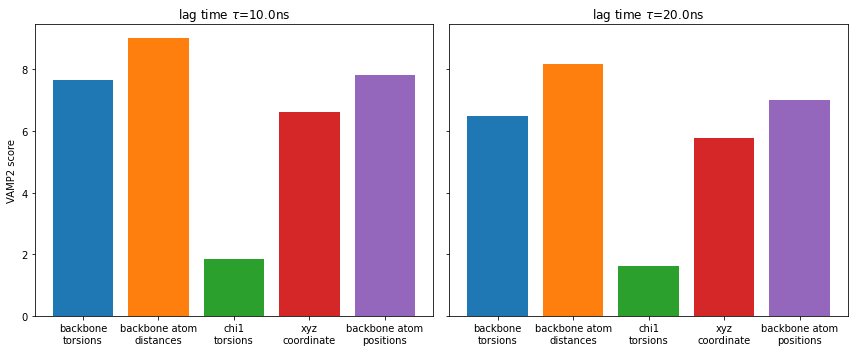

In [12]:
 dim = 11

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
for ax, lag in zip(axes.flat, [ 100,200]):
    torsions_scores = coor.vamp(torsions_data, lag=lag, dim=dim).score(
        test_data=torsions_data,
        score_method='VAMP2')
    scores = [torsions_scores.mean()]
    errors = [torsions_scores.std()]
    distances_scores = coor.vamp(distances_data, lag=lag, dim=dim).score(
        test_data=distances_data,
        score_method='VAMP2')
    scores += [distances_scores.mean()]
    errors += [distances_scores.std()]
    chi_scores = coor.vamp(chi_data, lag=lag, dim=dim).score(
        test_data=chi_data,
        score_method='VAMP2')
    scores += [chi_scores.mean()]
    errors += [chi_scores.std()]
    positions_scores = coor.vamp(positions_data, lag=lag, dim=dim).score(
        test_data=positions_data,
        score_method='VAMP2')
    scores += [positions_scores.mean()]
    errors += [positions_scores.std()]
    xyz_scores = coor.vamp(xyz_data, lag=lag, dim=dim).score(
        test_data=xyz_data,
        score_method='VAMP2')
    scores += [xyz_scores.mean()]
    errors += [xyz_scores.std()]
    ax.bar(labels, scores, yerr=errors, color=['C0', 'C1', 'C2','C3', 'C4'])
    ax.set_title(r'lag time $\tau$={:.1f}ns'.format(lag * 0.1))
    if lag == 100:
    
        vamp_bars_plot = dict(
            labels=labels, scores=scores, errors=errors, dim=dim, lag=lag)
axes[0].set_ylabel('VAMP2 score')
fig.tight_layout()